In [16]:
from py2neo import Graph, NodeSelector
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker, style

%matplotlib inline

style.use('ggplot')
plt.rcParams["figure.figsize"] = [12,6]


graph = Graph("http://localhost:7474", password = "admin")

In [2]:
data = DataFrame(graph.data("MATCH (a:Adresa)-[]-(s:Subjekt)-[:PRIJEMCE_SMLOUVA]-(sm:Smlouva) RETURN sm.smlouva_id, max(apoc.node.degree(a)) as d"))

In [3]:
stupen = data["d"].dropna()

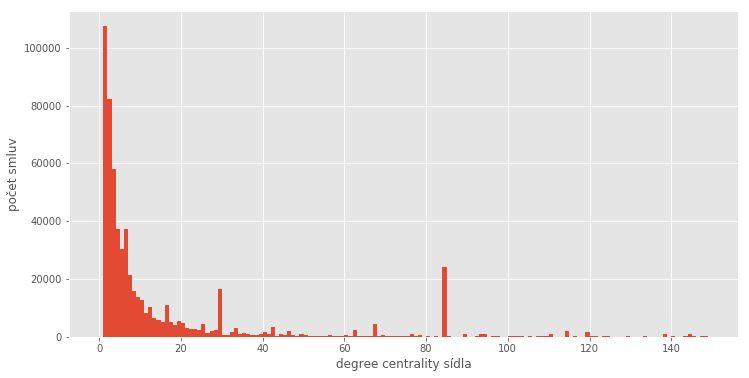

In [17]:
binwidth = 1

fig, axes = plt.subplots()
axes.set_xlabel("degree centrality sídla")
axes.set_ylabel("počet smluv")
# axes.set_yscale('log')
axes.hist(stupen, bins=range(0, 150, binwidth), rwidth=1)
fig.savefig("vystup/sidlo-smlouvy.pdf", bbox_inches='tight')

In [5]:
data3 = DataFrame(graph.data("MATCH (a:Adresa)-[]-(s:Subjekt)-[:PRIJEMCE_SMLOUVA]-(sm:Smlouva) RETURN sm.cena_vypoctena, apoc.node.degree(a) as d"))

In [6]:
data31 = data3.copy(deep=True)
data31['d'] = data31['d'] // 10
sums = data31.groupby('d').sum()
sums['d'] = sums.index

<Container object of 10 artists>

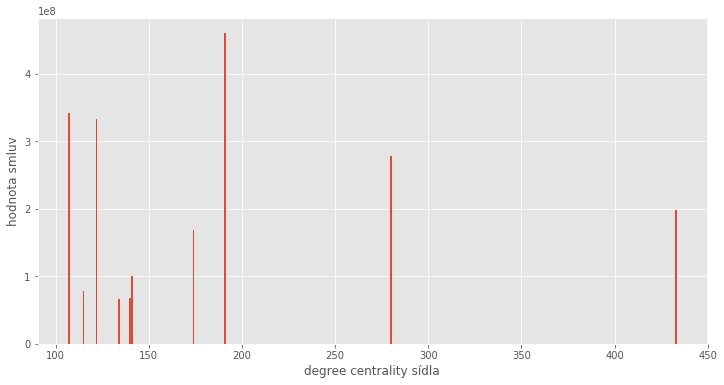

In [18]:
sums_f = sums.loc[(sums['d'] > 100)]

fig, axes = plt.subplots()
axes.set_xlabel("degree centrality sídla")
axes.set_ylabel("hodnota smluv")
# axes.set_yscale('log')
# axes.set_xlim([4000,4400])
# axes.set_ylim([0,100000000000])
axes.bar(sums_f['d'], sums_f['sm.cena_vypoctena'])
# fig.savefig("vystup/sidlo-hodnoty.pdf", bbox_inches='tight')

In [8]:
data4 = DataFrame(graph.data("MATCH (a:Adresa)-[]-(s:Subjekt) RETURN 1, apoc.node.degree(a) as d"))

In [9]:
data41 = data4.copy(deep=True)
data41['d'] = data41['d'] // 10
sums2 = data41.groupby('d').sum()
sums2['d'] = sums2.index

<Container object of 50 artists>

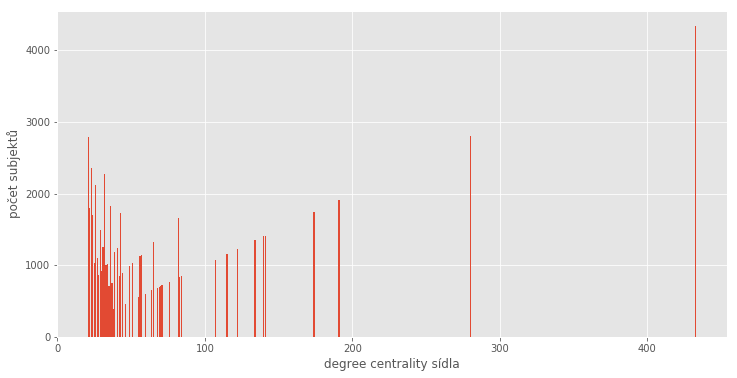

In [19]:
sums_f = sums2.loc[sums2['d'] > 20]

fig, axes = plt.subplots()
axes.set_xlabel("degree centrality sídla")
axes.set_ylabel("počet subjektů")
# axes.set_yscale('log')
# axes.set_xlim([0,500])
# axes.set_ylim([1,1000000])
axes.bar(sums_f['d'], sums_f['1'])
# fig.savefig("vystup/sidlo-hodnoty.pdf", bbox_inches='tight')

In [11]:
sums_1 = data3.groupby('d').sum()
sums_2 = data4.groupby('d').sum()
data5 = sums_1.join(sums_2)
data5['podil'] = data5['sm.cena_vypoctena'] / data5['1']
data5

sm.cena_vypoctena       1         podil
d                                            
1          1.734913e+11  208521  8.320088e+05
2          1.502298e+11  115826  1.297030e+06
3          1.346876e+11   70785  1.902771e+06
4          8.564232e+10   49084  1.744811e+06
5          1.815860e+11   36625  4.957979e+06
6          8.791868e+11   28536  3.080974e+07
7          6.158393e+10   22421  2.746707e+06
8          6.535126e+10   18288  3.573450e+06
9          1.107359e+11   16065  6.892991e+06
10         4.181154e+10   13200  3.167541e+06
11         2.947506e+10   10846  2.717598e+06
12         5.455614e+10    9636  5.661700e+06
13         1.252966e+10    9269  1.351781e+06
14         3.132613e+10    7938  3.946351e+06
15         8.847735e+09    6900  1.282280e+06
16         6.172283e+10    6736  9.163128e+06
17         1.265247e+10    6018  2.102437e+06
18         9.869114e+10    5256  1.877685e+07
19         7.763893e+09    5054  1.536188e+06
20         4.977963e+10    4700  1.059141e+07
21         5.485322e+11    4662  1.176603e+08
22         3.684899e+09    4136  8.909330e+05
23         5.849717e+09    3795  1.541427e+06
24         1.483963e+10    3984  3.724808e+06
25         1.394124e+10    3800  3.668746e+06
26         1.840697e+09    3120  5.899669e+05
27         9.240173e+09    3213  2.875871e+06
28         3.536621e+10    3136  1.127749e+07
29         1.180976e+10    2233  5.288740e+06
30         1.157672e+09    2400  4.823634e+05
...                 ...     ...           ...
494        3.041108e+08     494  6.156089e+05
516        1.588691e+05     516  3.078859e+02
551        2.602135e+07     551  4.722568e+04
562        2.291809e+07     562  4.077951e+04
565        4.494496e+07     565  7.954859e+04
570        8.799936e+06     570  1.543848e+04
577        1.247415e+08     577  2.161898e+05
602        8.753199e+08     602  1.454020e+06
647        8.263579e+06     647  1.277215e+04
658        5.552422e+07     658  8.438331e+04
659        4.989924e+07     659  7.571963e+04
683        4.415527e+07     683  6.464901e+04
699        9.721433e+07     699  1.390763e+05
707        2.421854e+07     707  3.425537e+04
718        4.356000e+06     718  6.066852e+03
766        3.968804e+07     766  5.181207e+04
826        6.357017e+07     826  7.696146e+04
828        6.037994e+08     828  7.292264e+05
839        1.560772e+08     839  1.860276e+05
846        6.565010e+08     846  7.760060e+05
1079       3.423856e+08    1079  3.173175e+05
1158       7.896277e+07    1158  6.818892e+04
1228       3.336482e+08    1228  2.717005e+05
1347       6.611086e+07    1347  4.908008e+04
1402       6.816116e+07    1402  4.861709e+04
1414       1.000203e+08    1414  7.073573e+04
1747       1.682552e+08    1747  9.631092e+04
1914       4.602147e+08    1914  2.404465e+05
2805       2.781504e+08    2805  9.916237e+04
4336       1.977265e+08    4336  4.560114e+04

[293 rows x 3 columns]

<Container object of 293 artists>

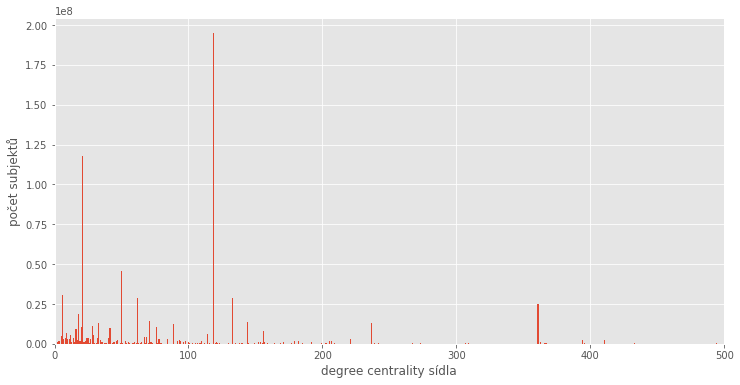

In [20]:
fig, axes = plt.subplots()
axes.set_xlabel("degree centrality sídla")
axes.set_ylabel("počet subjektů")
# axes.set_yscale('log')
axes.set_xlim([0,500])
# axes.set_ylim([1,1000000])
axes.bar(data5.index, data5['podil'])
# fig.savefig("vystup/sidlo-hodnoty.pdf", bbox_inches='tight')

In [13]:
data2 = DataFrame(graph.data("MATCH (a:Adresa) RETURN a.ruian, max(apoc.node.degree(a)) as d"))

In [14]:
stupen2 = data2["d"].dropna()

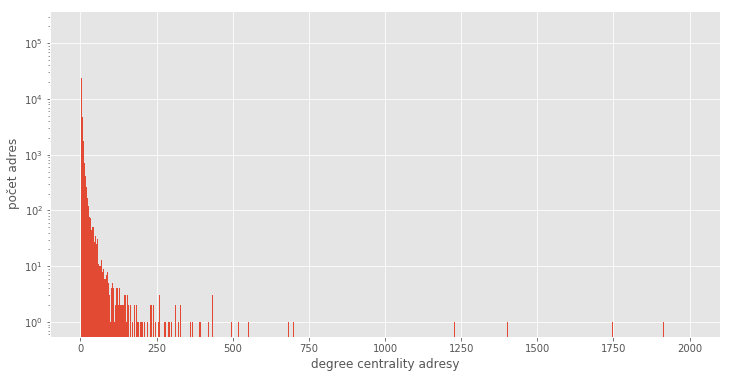

In [21]:
binwidth = 1

fig, axes = plt.subplots()
axes.set_xlabel("degree centrality adresy")
axes.set_ylabel("počet adres")
axes.set_yscale('log')
# axes.set_ylim([0,75000])
axes.hist(stupen2, bins=range(0, 2000, binwidth), rwidth=1)
fig.savefig("vystup/sidlo-centralita.pdf", bbox_inches='tight')